In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
from bs4 import BeautifulSoup
import joblib

In [8]:
df = pd.read_csv('questions.csv')
df
# 0 = Not duplicate
# 1 = Duplicate

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0
...,...,...,...,...,...,...
404346,404346,789792,789793,How many keywords are there in the Racket prog...,How many keywords are there in PERL Programmin...,0
404347,404347,789794,789795,Do you believe there is life after death?,Is it true that there is life after death?,1
404348,404348,789796,789797,What is one coin?,What's this coin?,0
404349,404349,789798,789799,What is the approx annual cost of living while...,I am having little hairfall problem but I want...,0


In [9]:
def preprocess(q):

  q = str(q).lower().strip()

  # Replace certain special characters with their string equivalents
  q = q.replace('%', ' percent ')
  q = q.replace('$', ' dollar ')
  q = q.replace('₹', ' repee ')
  q = q.replace('€', ' euro ')
  q = q.replace('@', ' at ')

  # The pattern '[math]' appears qround 900 times in the whole data
  q = q.replace('[math]', '')

  # Replacing some numbers with string equivalents(not perfect, can be done better to account for more cases)
  q = q.replace(',000,000,000 ', 'b ')
  q = q.replace(',000,000 ', 'm ')
  q = q.replace(',000 ', 'k ')
  q = re.sub(r'([0-9]+)000000000', r'\1b', q)
  q = re.sub(r'([0-9]+)000000', r'\1m', q)
  q = re.sub(r'([0-9]+)000', r'\1k', q)

  # Removing HTML tags
  q = BeautifulSoup(q)
  q = q.get_text()

  # Deconstructing words
  contractions = {
    "ain't": "am not",
    "aren't": "are not",
    "can't": "can not",
    "can't've": "can not have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "i would",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
    }

  q_decontracted = []

  from nltk.corpus import stopwords
  sw = stopwords.words('english')

  from nltk.stem import WordNetLemmatizer
  lemmatizer = WordNetLemmatizer()

  import string
  punc = string.punctuation

  for word in q.split():
    if word in contractions.keys():
      word = contractions[word]

    if word in sw:
      word = ''

    word = lemmatizer.lemmatize(word)

    q_decontracted.append(word)

  q = ' '.join(q_decontracted)

  # Remove punctuations
  pattern = re.compile('\W')
  q = pattern.sub(' ', q).strip()
  # q = re.sub(pattern, ' ', q).strip()

  return q


In [10]:
preprocess("I've already! wasn't <b>done</b>?")

'i have already  was not done'

In [11]:
df['question1'] = df['question1'].apply(preprocess)
df['question2'] = df['question2'].apply(preprocess)

In [12]:
df['q1_len'] = df['question1'].str.len()
df['q2_len'] = df['question2'].str.len()

In [13]:
df['q1_num_words'] = df['question1'].apply(lambda x:len(x.split(" ")))
df['q2_num_words'] = df['question2'].apply(lambda x:len(x.split(" ")))

In [14]:
def common_word(row):
  s1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
  s2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))
  s1.intersection_update(s2)
  return len(s1)
  # return s1 & s2

In [15]:
df['word_common'] = df.apply(common_word, axis=1)
df

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common
0,0,1,2,step step guide invest share market india,step step guide invest share market,0,45,38,11,9,6
1,1,3,4,story kohinoor koh i noor diamond,would happen indian government stole kohino...,0,36,74,9,16,6
2,2,5,6,increase speed internet connection using vpn,internet speed increased hacking dns,0,49,39,11,8,3
3,3,7,8,mentally lonely solve it,find remainder 23 24 math divided 24 23,0,29,47,9,16,1
4,4,9,10,one dissolve water quikly sugar salt methan...,fish would survive salt water,0,64,30,14,6,3
...,...,...,...,...,...,...,...,...,...,...,...
404346,404346,789792,789793,many keywords racket programming language ...,many keywords perl programming language l...,0,62,59,13,12,7
404347,404347,789794,789795,believe life death,true life death,1,21,19,6,7,3
404348,404348,789796,789797,one coin,what is coin,0,8,13,2,4,1
404349,404349,789798,789799,approx annual cost living studying uic chic...,little hairfall problem want use hair styli...,0,67,88,15,24,1


In [16]:
def total_word(row):
  s1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
  s2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))
  return len(s1) + len(s2)

In [17]:
df['word_total'] = df.apply(total_word, axis=1)

In [18]:
df['word_share'] = round(df['word_common']/df['word_total'], 2)
df

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
0,0,1,2,step step guide invest share market india,step step guide invest share market,0,45,38,11,9,6,13,0.46
1,1,3,4,story kohinoor koh i noor diamond,would happen indian government stole kohino...,0,36,74,9,16,6,19,0.32
2,2,5,6,increase speed internet connection using vpn,internet speed increased hacking dns,0,49,39,11,8,3,13,0.23
3,3,7,8,mentally lonely solve it,find remainder 23 24 math divided 24 23,0,29,47,9,16,1,12,0.08
4,4,9,10,one dissolve water quikly sugar salt methan...,fish would survive salt water,0,64,30,14,6,3,17,0.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...
404346,404346,789792,789793,many keywords racket programming language ...,many keywords perl programming language l...,0,62,59,13,12,7,16,0.44
404347,404347,789794,789795,believe life death,true life death,1,21,19,6,7,3,8,0.38
404348,404348,789796,789797,one coin,what is coin,0,8,13,2,4,1,6,0.17
404349,404349,789798,789799,approx annual cost living studying uic chic...,little hairfall problem want use hair styli...,0,67,88,15,24,1,24,0.04


### Advanced Features

In [19]:
from nltk.corpus import stopwords

def fetch_token_features(row):

  q1 = row['question1']
  q2 = row['question2']

  SAFE_DIV = 0.0001

  STOP_WORDS = stopwords.words('english')

  token_features = [0.0]*8

  # Converting the sentense into Tokens:
  q1_tokens = q1.split()
  q2_tokens = q2.split()

  if len(q1_tokens) == 0 or len(q2_tokens) == 0:
    return token_features

  # Get the non-stopwords in Questions
  q1_words = set([word for word in q1_tokens if word not in STOP_WORDS])
  q2_words = set([word for word in q2_tokens if word not in STOP_WORDS])

  # Get the stopwords in Questions
  q1_stops = set([word for word in q1_tokens if word in STOP_WORDS])
  q2_stops = set([word for word in q2_tokens if word in STOP_WORDS])

  # Get the common non-stopwords from Question pair
  common_word_count = len(q1_words.intersection(q2_words))

  # Get the common stopwords from Question pair
  common_stop_count = len(q1_stops.intersection(q2_stops))

  # Get the common tokens from Question pair
  common_token_count = len(set(q1_tokens).intersection(set(q2_tokens)))

  token_features[0] = common_word_count / (min(len(q1_words), len(q2_words)) + SAFE_DIV)
  token_features[1] = common_word_count / (max(len(q1_words), len(q2_words)) + SAFE_DIV)
  token_features[2] = common_stop_count / (min(len(q1_stops), len(q2_stops)) + SAFE_DIV)
  token_features[3] = common_stop_count / (max(len(q1_stops), len(q2_stops)) + SAFE_DIV)
  token_features[4] = common_token_count / (min(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
  token_features[5] = common_token_count / (max(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)

  # Last word of both question is same or not
  token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])

  # First word of both question is same or not
  token_features[7] = int(q1_tokens[0] == q2_tokens[0])

  return token_features

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404351 entries, 0 to 404350
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            404351 non-null  int64  
 1   qid1          404351 non-null  int64  
 2   qid2          404351 non-null  int64  
 3   question1     404351 non-null  object 
 4   question2     404351 non-null  object 
 5   is_duplicate  404351 non-null  int64  
 6   q1_len        404351 non-null  int64  
 7   q2_len        404351 non-null  int64  
 8   q1_num_words  404351 non-null  int64  
 9   q2_num_words  404351 non-null  int64  
 10  word_common   404351 non-null  int64  
 11  word_total    404351 non-null  int64  
 12  word_share    404351 non-null  float64
dtypes: float64(1), int64(10), object(2)
memory usage: 40.1+ MB


In [21]:
token_features = df.apply(fetch_token_features, axis=1)

df['cwc_min'] = list(map(lambda x: x[0], token_features))
df['cwc_max'] = list(map(lambda x: x[1], token_features))
df['csc_min'] = list(map(lambda x: x[2], token_features))
df['csc_max'] = list(map(lambda x: x[3], token_features))
df['ctc_min'] = list(map(lambda x: x[4], token_features))
df['ctc_max'] = list(map(lambda x: x[5], token_features))
df['last_word_eq'] = list(map(lambda x: x[6], token_features))
df['first_word_eq'] = list(map(lambda x: x[7], token_features))
df

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,...,word_total,word_share,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq
0,0,1,2,step step guide invest share market india,step step guide invest share market,0,45,38,11,9,...,13,0.46,0.999980,0.833319,0.0000,0.0000,0.833319,0.714276,0.0,1.0
1,1,3,4,story kohinoor koh i noor diamond,would happen indian government stole kohino...,0,36,74,9,16,...,19,0.32,0.799984,0.399996,0.9999,0.9999,0.833319,0.454541,0.0,0.0
2,2,5,6,increase speed internet connection using vpn,internet speed increased hacking dns,0,49,39,11,8,...,13,0.23,0.399992,0.333328,0.0000,0.0000,0.399992,0.333328,0.0,0.0
3,3,7,8,mentally lonely solve it,find remainder 23 24 math divided 24 23,0,29,47,9,16,...,12,0.08,0.000000,0.000000,0.0000,0.0000,0.000000,0.000000,0.0,0.0
4,4,9,10,one dissolve water quikly sugar salt methan...,fish would survive salt water,0,64,30,14,6,...,17,0.18,0.399992,0.199998,0.0000,0.0000,0.399992,0.199998,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404346,404346,789792,789793,many keywords racket programming language ...,many keywords perl programming language l...,0,62,59,13,12,...,16,0.44,0.857131,0.857131,0.0000,0.0000,0.857131,0.857131,1.0,1.0
404347,404347,789794,789795,believe life death,true life death,1,21,19,6,7,...,8,0.38,0.666644,0.666644,0.0000,0.0000,0.666644,0.666644,1.0,0.0
404348,404348,789796,789797,one coin,what is coin,0,8,13,2,4,...,6,0.17,0.999900,0.499975,0.0000,0.0000,0.499975,0.333322,1.0,0.0
404349,404349,789798,789799,approx annual cost living studying uic chic...,little hairfall problem want use hair styli...,0,67,88,15,24,...,24,0.04,0.000000,0.000000,0.0000,0.0000,0.000000,0.000000,0.0,0.0


In [22]:
import distance

def fetch_length_features(row):

  q1 = row['question1']
  q2 = row['question2']

  length_features=[0.0]*3

  # converting the sentense into tokens
  q1_tokens = q1.split()
  q2_tokens = q2.split()

  if len(q1_tokens) == 0 or len(q2_tokens) == 0:
    return length_features

  # Absolute length features
  length_features[0] = abs(len(q1_tokens) - len(q2_tokens))

  # Average token length of both Questions
  length_features[1] = (len(q1_tokens) + len(q2_tokens))/2

  strs = list(distance.lcsubstrings(q1, q2)) # longest common substring
  length_features[2] = (len(strs[0]) if strs else 0) / (min(len(q1), len(q2)) + 1)

  return length_features

In [23]:
length_features = df.apply(fetch_length_features, axis=1)

df['abs_len_diff'] = list(map(lambda x:x[0], length_features))
df['mean_abs'] = list(map(lambda x:x[1], length_features))
df['longest_substr_ratio'] = list(map(lambda x:x[2], length_features))
df

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,...,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_abs,longest_substr_ratio
0,0,1,2,step step guide invest share market india,step step guide invest share market,0,45,38,11,9,...,0.833319,0.0000,0.0000,0.833319,0.714276,0.0,1.0,1.0,6.5,0.974359
1,1,3,4,story kohinoor koh i noor diamond,would happen indian government stole kohino...,0,36,74,9,16,...,0.399996,0.9999,0.9999,0.833319,0.454541,0.0,0.0,5.0,8.5,0.837838
2,2,5,6,increase speed internet connection using vpn,internet speed increased hacking dns,0,49,39,11,8,...,0.333328,0.0000,0.0000,0.399992,0.333328,0.0,0.0,1.0,5.5,0.225000
3,3,7,8,mentally lonely solve it,find remainder 23 24 math divided 24 23,0,29,47,9,16,...,0.000000,0.0000,0.0000,0.000000,0.000000,0.0,0.0,4.0,6.0,0.100000
4,4,9,10,one dissolve water quikly sugar salt methan...,fish would survive salt water,0,64,30,14,6,...,0.199998,0.0000,0.0000,0.399992,0.199998,0.0,0.0,5.0,7.5,0.225806
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404346,404346,789792,789793,many keywords racket programming language ...,many keywords perl programming language l...,0,62,59,13,12,...,0.857131,0.0000,0.0000,0.857131,0.857131,1.0,1.0,0.0,7.0,0.633333
404347,404347,789794,789795,believe life death,true life death,1,21,19,6,7,...,0.666644,0.0000,0.0000,0.666644,0.666644,1.0,0.0,0.0,3.0,0.700000
404348,404348,789796,789797,one coin,what is coin,0,8,13,2,4,...,0.499975,0.0000,0.0000,0.499975,0.333322,1.0,0.0,1.0,2.5,0.555556
404349,404349,789798,789799,approx annual cost living studying uic chic...,little hairfall problem want use hair styli...,0,67,88,15,24,...,0.000000,0.0000,0.0000,0.000000,0.000000,0.0,0.0,4.0,11.0,0.058824


In [24]:
# Fuzzy Features
from fuzzywuzzy import fuzz

def fetch_fuzzy_features(row):

  q1 = row['question1']
  q2 = row['question2']

  fuzzy_features = [0.0]*4

  # fuzzy ration
  fuzzy_features[0] = fuzz.QRatio(q1, q2)

  # fuzzy_partial_ratio
  fuzzy_features[1] = fuzz.partial_ratio(q1, q2)

  # token_sort_ration
  fuzzy_features[2] = fuzz.token_sort_ratio(q1, q2)

  # token_set_ration
  fuzzy_features[3] = fuzz.token_set_ratio(q1, q2)

  return fuzzy_features

/usr/local/lib/python3.11/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [25]:
fuzzy_features = df.apply(fetch_fuzzy_features, axis=1)

df['fuzz_ratio'] = list(map(lambda x:x[0], fuzzy_features))
df['fuzz_partial_ratio'] = list(map(lambda x:x[1], fuzzy_features))
df['token_sort_ratio'] = list(map(lambda x:x[2], fuzzy_features))
df['token_set_ratio'] = list(map(lambda x:x[3], fuzzy_features))

In [26]:
final_df = df.drop(columns=['id', 'qid1', 'qid2', 'question1', 'question2'])
final_df

,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share,cwc_min,cwc_max,...,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_abs,longest_substr_ratio,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio
0,0,45,38,11,9,6,13,0.46,0.999980,0.833319,...,0.714276,0.0,1.0,1.0,6.5,0.974359,92,100,92,100
1,0,36,74,9,16,6,19,0.32,0.799984,0.399996,...,0.454541,0.0,0.0,5.0,8.5,0.837838,62,94,61,90
2,0,49,39,11,8,3,13,0.23,0.399992,0.333328,...,0.333328,0.0,0.0,1.0,5.5,0.225000,43,54,65,65
3,0,29,47,9,16,1,12,0.08,0.000000,0.000000,...,0.000000,0.0,0.0,4.0,6.0,0.100000,34,38,25,28
4,0,64,30,14,6,3,17,0.18,0.399992,0.199998,...,0.199998,0.0,0.0,5.0,7.5,0.225806,40,53,40,51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404346,0,62,59,13,12,7,16,0.44,0.857131,0.857131,...,0.857131,1.0,1.0,0.0,7.0,0.633333,93,90,89,95
404347,1,21,19,6,7,3,8,0.38,0.666644,0.666644,...,0.666644,1.0,0.0,0.0,3.0,0.700000,75,79,61,80
404348,0,8,13,2,4,1,6,0.17,0.999900,0.499975,...,0.333322,1.0,0.0,1.0,2.5,0.555556,48,62,50,67
404349,0,67,88,15,24,1,24,0.04,0.000000,0.000000,...,0.000000,0.0,0.0,4.0,11.0,0.058824,28,33,29,29


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

questions = list(df['question1']) + list(df['question2'])
cv = CountVectorizer(max_features=5000)
q1_arr, q2_arr = np.vsplit(cv.fit_transform(questions).toarray(), 2)

joblib.dump(cv, 'countvectorizer.joblib')

['countvectorizer.joblib']

In [ ]:
temp_df1 = pd.DataFrame(q1_arr, index=df.index)
temp_df2 = pd.DataFrame(q2_arr, index=df.index)
temp_df = pd.concat([temp_df1, temp_df2], axis=1)

In [ ]:
final_df = pd.concat([final_df, temp_df], axis=1)
final_df

,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share,cwc_min,cwc_max,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
0,0,45,38,11,9,6,13,0.46,0.999980,0.833319,...,0,0,0,0,0,0,0,0,0,0
1,0,36,74,9,16,6,19,0.32,0.799984,0.399996,...,0,0,0,0,0,0,0,0,0,0
2,0,49,39,11,8,3,13,0.23,0.399992,0.333328,...,0,0,0,0,0,0,0,0,0,0
3,0,29,47,9,16,1,12,0.08,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
4,0,64,30,14,6,3,17,0.18,0.399992,0.199998,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404346,0,62,59,13,12,7,16,0.44,0.857131,0.857131,...,0,0,0,0,0,0,0,0,0,0
404347,1,21,19,6,7,3,8,0.38,0.666644,0.666644,...,0,0,0,0,0,0,0,0,0,0
404348,0,8,13,2,4,1,6,0.17,0.999900,0.499975,...,0,0,0,0,0,0,0,0,0,0
404349,0,67,88,15,24,1,24,0.04,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0


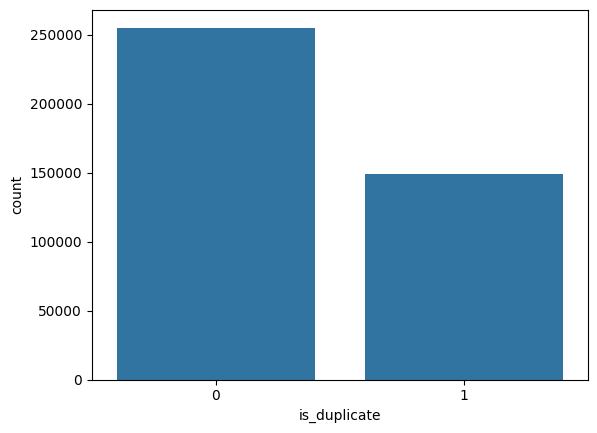

In [ ]:
sns.barplot(df['is_duplicate'].value_counts())
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(final_df.iloc[:, 1:].values, final_df.iloc[:,0].values, stratify=final_df.iloc[:,0].values, test_size=0.4, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
rf1 = RandomForestClassifier(class_weight='balanced')
rf1.fit(x_train, y_train)
y_pred = rf1.predict(x_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

joblib.dump(rf1, 'cv_randomforest.joblib')

0.8199219740201927
[[86536 15482]
 [13644 46079]]


['cv_randomforest.joblib']

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
xgb1 = XGBClassifier(scale_pos_weight=250000 / 150000) # because we have 250000->0 and 150000->1
xgb1.fit(x_train, y_train)
y_pred = xgb1.predict(x_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

joblib.dump(xgb1, 'cv_xgbBoost.joblib')

0.7817807482332866
[[74932 27086]
 [ 8209 51514]]


['cv_xgbBoost.joblib']

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer

questions = list(df['question1']) + list(df['question2'])
tfidf = TfidfVectorizer(max_features=5000)
q1_arr, q2_arr = np.vsplit(tfidf.fit_transform(questions).toarray(), 2)

joblib.dump(tfidf, 'tfidfvectorizer.joblib')

['tfidfvectorizer.joblib']

In [28]:
temp_df1 = pd.DataFrame(q1_arr, index=df.index)
temp_df2 = pd.DataFrame(q2_arr, index=df.index)
temp_df = pd.concat([temp_df1, temp_df2], axis=1)

In [29]:
final_df = pd.concat([final_df, temp_df], axis=1)
final_df

,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share,cwc_min,cwc_max,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
0,0,45,38,11,9,6,13,0.46,0.999980,0.833319,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,36,74,9,16,6,19,0.32,0.799984,0.399996,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,49,39,11,8,3,13,0.23,0.399992,0.333328,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,29,47,9,16,1,12,0.08,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,64,30,14,6,3,17,0.18,0.399992,0.199998,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404346,0,62,59,13,12,7,16,0.44,0.857131,0.857131,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
404347,1,21,19,6,7,3,8,0.38,0.666644,0.666644,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
404348,0,8,13,2,4,1,6,0.17,0.999900,0.499975,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
404349,0,67,88,15,24,1,24,0.04,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(final_df.iloc[:, 1:].values, final_df.iloc[:,0].values, stratify=final_df.iloc[:,0].values, test_size=0.4, random_state=42)

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
rf2 = RandomForestClassifier(class_weight='balanced')
rf2.fit(x_train, y_train)
y_pred = rf2.predict(x_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

joblib.dump(rf2, 'tfidf_randomforest.joblib')

0.8186236019314831
[[86114 15904]
 [13432 46291]]


['tfidf_randomforest.joblib']

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
xgb2 = XGBClassifier(scale_pos_weight=250000 / 150000)
xgb2.fit(x_train, y_train)
y_pred = xgb2.predict(x_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

joblib.dump(xgb2, 'tfidf_xgbBoost.joblib')

0.7823742897595538
[[75158 26860]
 [ 8339 51384]]


['tfidf_xgbBoost.joblib']

## Testing

In [ ]:
def test_common_words(q1,q2):
    w1 = set(map(lambda word: word.lower().strip(), q1.split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), q2.split(" ")))
    return len(w1 & w2)

In [ ]:
def test_total_words(q1,q2):
    w1 = set(map(lambda word: word.lower().strip(), q1.split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), q2.split(" ")))
    return (len(w1) + len(w2))

In [ ]:
def test_fetch_token_features(q1,q2):

    SAFE_DIV = 0.0001

    STOP_WORDS = stopwords.words("english")

    token_features = [0.0]*8

    # Converting the Sentence into Tokens:
    q1_tokens = q1.split()
    q2_tokens = q2.split()

    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return token_features

    # Get the non-stopwords in Questions
    q1_words = set([word for word in q1_tokens if word not in STOP_WORDS])
    q2_words = set([word for word in q2_tokens if word not in STOP_WORDS])

    #Get the stopwords in Questions
    q1_stops = set([word for word in q1_tokens if word in STOP_WORDS])
    q2_stops = set([word for word in q2_tokens if word in STOP_WORDS])

    # Get the common non-stopwords from Question pair
    common_word_count = len(q1_words.intersection(q2_words))

    # Get the common stopwords from Question pair
    common_stop_count = len(q1_stops.intersection(q2_stops))

    # Get the common Tokens from Question pair
    common_token_count = len(set(q1_tokens).intersection(set(q2_tokens)))


    token_features[0] = common_word_count / (min(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[1] = common_word_count / (max(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[2] = common_stop_count / (min(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[3] = common_stop_count / (max(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[4] = common_token_count / (min(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    token_features[5] = common_token_count / (max(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)

    # Last word of both question is same or not
    token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])

    # First word of both question is same or not
    token_features[7] = int(q1_tokens[0] == q2_tokens[0])

    return token_features

In [ ]:
def test_fetch_length_features(q1,q2):

    length_features = [0.0]*3

    # Converting the Sentence into Tokens:
    q1_tokens = q1.split()
    q2_tokens = q2.split()

    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return length_features

    # Absolute length features
    length_features[0] = abs(len(q1_tokens) - len(q2_tokens))

    #Average Token Length of both Questions
    length_features[1] = (len(q1_tokens) + len(q2_tokens))/2

    strs = list(distance.lcsubstrings(q1, q2))
    length_features[2] = len(strs[0]) / (min(len(q1), len(q2)) + 1)

    return length_features

In [ ]:
def test_fetch_fuzzy_features(q1,q2):

    fuzzy_features = [0.0]*4

    # fuzz_ratio
    fuzzy_features[0] = fuzz.QRatio(q1, q2)

    # fuzz_partial_ratio
    fuzzy_features[1] = fuzz.partial_ratio(q1, q2)

    # token_sort_ratio
    fuzzy_features[2] = fuzz.token_sort_ratio(q1, q2)

    # token_set_ratio
    fuzzy_features[3] = fuzz.token_set_ratio(q1, q2)

    return fuzzy_features

In [ ]:
def query_point_creator(q1, q2):

  input_query = []

  #preprocess
  q1 = preprocess(q1)
  q2 = preprocess(q2)

  # fetch basic features
  input_query.append(len(q1))
  input_query.append(len(q2))

  input_query.append(len(q1.split(" ")))
  input_query.append(len(q2.split(" ")))

  input_query.append(test_common_words(q1, q2))
  input_query.append(test_total_words(q1, q2))
  input_query.append(round(test_common_words(q1, q2)/(test_total_words(q1, q2)+1)))

  # fetch token features
  token_features = test_fetch_token_features(q1, q2)
  input_query.extend(token_features)

  # fetch length based features
  length_features = test_fetch_length_features(q1, q2)
  input_query.extend(length_features)

  # fetch fuzzy features
  fuzzy_features = test_fetch_fuzzy_features(q1, q2)
  input_query.extend(fuzzy_features)

  # bow features for q1
  q1_bow = tfidf.transform([q1]).toarray()

  # bow features for q2
  q2_bow = tfidf.transform([q2]).toarray()

  return np.hstack((np.array(input_query).reshape(1,22), q1_bow, q2_bow))

In [ ]:
q1 = 'Where is the capital of India?'
q2 = 'What is the current capital of Pakistan?'
q3 = 'Which city serves as the capital of India?'
q4 = 'What is the business capital of India?'

In [ ]:
rf2.predict(query_point_creator(q1, q4))

array([0])

In [1]:
!pip install xgboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.9/253.9 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.4/322.4 MB 3.2 MB/s eta 0:00:00


In [2]:
!pip install xgboost

In [3]:
!pip install distance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 180.3/180.3 kB 4.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for distance: filename=distance-0.1.3-py3-none-any.whl size=16321 sha256=b1eff6e98df563613798c859caafa859c02901b280c9da649cb7335a7b5ff3c3
  Stored in directory: /root/.cache/pip/wheels/fb/cd/9c/3ab5d666e3bcacc58900b10959edd3816cc9557c7337986322
Successfully built distance


In [4]:
!pip install fuzzywuzzy

In [5]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [6]:
!pip install joblib